In [83]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('bmh')
import seaborn as sns
import os

In [84]:
df_titanic = sns.load_dataset("titanic")
df_titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


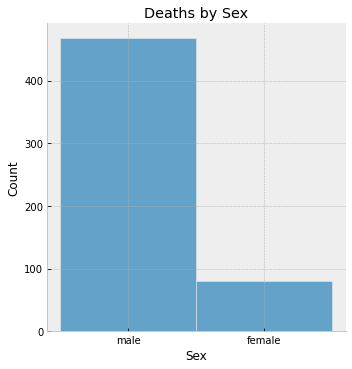

<Figure size 432x288 with 0 Axes>

In [85]:
df_titanic_deaths=df_titanic[df_titanic.alive=='no']
#df_titanic_deaths_by_class=df_titanic_deaths.groupby('sex').pclass.count()
ax = sns.displot(data=df_titanic_deaths, x='sex', fill=True)
ax.set(xlabel='Sex', ylabel='Count', title='Deaths by Sex')
plt.figure();



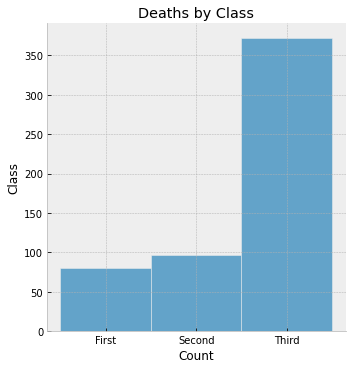

<Figure size 432x288 with 0 Axes>

In [86]:
ax = sns.displot(data=df_titanic_deaths, x='class', fill=True)
ax.set(xlabel='Count', ylabel='Class', title='Deaths by Class')
plt.figure();

In [87]:
#gkk = df.groupby(['Team', 'Position'])
#print(tips.groupby('time')['total_bill'].describe())
#df_titanic_deaths_by_class=df_titanic_deaths[['sex', 'class']]
#df_titanic_deaths_by_class=df_titanic_deaths_by_class.groupby(['class']).count()
#df_titanic_deaths_by_class.head()
#ax = sns.displot(data=df_titanic_deaths_by_class, x='class', fill=True)
#plt.figure();#